In [6]:
############################
### 1
### Count Data Models
data<-read.table("galapagos.txt", sep="\t", dec=".", header=TRUE)
attach(data)

#plot(data$name, data$Species)

## a)


model.main<-glm(Species~Area+Elevation+Nearest+Scruz+Adjacent, family=poisson(link="log"), data=data)
summary(model.main)

newdata<-data.frame(Area=58.27, Elevation=198, Nearest=1.1, Scruz=88.3, Adjacent=0.57)
predict(model.main, newdata = newdata, type = "response") # point prediction

# 1 
# 27.86135 



The following objects are masked from data (pos = 3):

    Adjacent, Area, Elevation, name, Nearest, Scruz, Species


The following objects are masked from data (pos = 4):

    Adjacent, Area, Elevation, name, Nearest, Scruz, Species


The following objects are masked from data (pos = 5):

    Adjacent, Area, Elevation, name, Nearest, Scruz, Species





Call:
glm(formula = Species ~ Area + Elevation + Nearest + Scruz + 
    Adjacent, family = poisson(link = "log"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.2752  -4.4966  -0.9443   1.9168  10.1849  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.155e+00  5.175e-02  60.963  < 2e-16 ***
Area        -5.799e-04  2.627e-05 -22.074  < 2e-16 ***
Elevation    3.541e-03  8.741e-05  40.507  < 2e-16 ***
Nearest      8.826e-03  1.821e-03   4.846 1.26e-06 ***
Scruz       -5.709e-03  6.256e-04  -9.126  < 2e-16 ***
Adjacent    -6.630e-04  2.933e-05 -22.608  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  716.85  on 24  degrees of freedom
AIC: 889.68

Number of Fisher Scoring iterations: 5


1 
27.86135

In [7]:
## b)
model.H0<-glm(Species~Area, family=poisson(link="log"), data=data)
summary(model.H0)

model.H1<-model.main
summary(model.H1)

anova(model.H0, model.H1, test="Chi")
anova(model.H0, model.H1, test="Chi")$Deviance[2] # value of test statistic = [1] 1898.746
anova(model.H0, model.H1, test="Chi")$"Pr(>Chi)"[2] # p-value 2.2e-16 ~ 0


Call:
glm(formula = Species ~ Area, family = poisson(link = "log"), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-10.9207   -8.2607   -4.4610    0.3474   25.2948  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 4.230e+00  2.250e-02  188.02   <2e-16 ***
Area        4.087e-04  1.122e-05   36.42   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3510.7  on 29  degrees of freedom
Residual deviance: 2615.6  on 28  degrees of freedom
AIC: 2780.4

Number of Fisher Scoring iterations: 5



Call:
glm(formula = Species ~ Area + Elevation + Nearest + Scruz + 
    Adjacent, family = poisson(link = "log"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.2752  -4.4966  -0.9443   1.9168  10.1849  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.155e+00  5.175e-02  60.963  < 2e-16 ***
Area        -5.799e-04  2.627e-05 -22.074  < 2e-16 ***
Elevation    3.541e-03  8.741e-05  40.507  < 2e-16 ***
Nearest      8.826e-03  1.821e-03   4.846 1.26e-06 ***
Scruz       -5.709e-03  6.256e-04  -9.126  < 2e-16 ***
Adjacent    -6.630e-04  2.933e-05 -22.608  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  716.85  on 24  degrees of freedom
AIC: 889.68

Number of Fisher Scoring iterations: 5


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,2615.5915,NA,NA,NA
2,24,716.8458,4,1898.746,0


[1] 1898.746

[1] 0

In [8]:
## c)
modelQuasi.main<-glm(Species~Area+Elevation+Nearest+Scruz+Adjacent, family=quasipoisson(link="log"), data=data)
summary(modelQuasi.main)
summary(modelQuasi.main)$dispersion # unbiased estimate for the dispersion parameter = [1] 31.74921

## d)
quasi.sqrt1<-glm(Species~Area, family=quasipoisson(link="sqrt"), data=data)
summary(quasi.sqrt1)

quasi.sqrt2<-glm(Species~Area+Elevation+Nearest+Scruz+Adjacent, family=quasipoisson(link="sqrt"), data=data)
summary(quasi.sqrt2)

anova(quasi.sqrt1, quasi.sqrt2, test="F")
anova(quasi.sqrt1, quasi.sqrt2, test="F")$"Pr(>F)"[2] # p-value = [1] 1.330076e-05
anova(quasi.sqrt1, quasi.sqrt2, test="F")$F[2] #value of the test statistic = [1] 12.38003


Call:
glm(formula = Species ~ Area + Elevation + Nearest + Scruz + 
    Adjacent, family = quasipoisson(link = "log"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.2752  -4.4966  -0.9443   1.9168  10.1849  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.1548079  0.2915901  10.819 1.03e-10 ***
Area        -0.0005799  0.0001480  -3.918 0.000649 ***
Elevation    0.0035406  0.0004925   7.189 1.98e-07 ***
Nearest      0.0088256  0.0102622   0.860 0.398292    
Scruz       -0.0057094  0.0035251  -1.620 0.118380    
Adjacent    -0.0006630  0.0001653  -4.012 0.000511 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 31.74921)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  716.85  on 24  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


[1] 31.74921


Call:
glm(formula = Species ~ Area, family = quasipoisson(link = "sqrt"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-11.469   -7.938   -3.532    0.904   22.479  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.761879   0.959977   8.085 8.37e-09 ***
Area        0.003612   0.001080   3.345  0.00235 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 101.0026)

    Null deviance: 3510.7  on 29  degrees of freedom
Residual deviance: 2350.3  on 28  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 6



Call:
glm(formula = Species ~ Area + Elevation + Nearest + Scruz + 
    Adjacent, family = quasipoisson(link = "sqrt"), data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-9.067  -3.845  -1.645   1.491  10.065  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.9918571  0.8978810   4.446 0.000170 ***
Area        -0.0020034  0.0010511  -1.906 0.068686 .  
Elevation    0.0162864  0.0025155   6.474 1.07e-06 ***
Nearest      0.0085413  0.0494142   0.173 0.864217    
Scruz       -0.0108850  0.0100973  -1.078 0.291744    
Adjacent    -0.0034851  0.0008297  -4.200 0.000317 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 32.67954)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  732.05  on 24  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 10


,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,2350.3442,NA,NA,NA,NA
2,24,732.0498,4,1618.294,12.38003,1.330076e-05


[1] 1.330076e-05

[1] 12.38003

In [9]:
## e)
library(MASS)

negative.bin<-glm.nb(Species~Area+Elevation+Nearest+Scruz+Adjacent, data=data) # log link function is default here
summary(negative.bin)

fitted(negative.bin)[1]

# 1 
# 68.28249


Call:
glm.nb(formula = Species ~ Area + Elevation + Nearest + Scruz + 
    Adjacent, data = data, init.theta = 1.674602286, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1344  -0.8597  -0.1476   0.4576   1.8416  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.9065247  0.2510344  11.578  < 2e-16 ***
Area        -0.0006336  0.0002865  -2.211 0.027009 *  
Elevation    0.0038551  0.0006916   5.574 2.49e-08 ***
Nearest      0.0028264  0.0136618   0.207 0.836100    
Scruz       -0.0018976  0.0028096  -0.675 0.499426    
Adjacent    -0.0007605  0.0002278  -3.338 0.000842 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(1.6746) family taken to be 1)

    Null deviance: 88.431  on 29  degrees of freedom
Residual deviance: 33.196  on 24  degrees of freedom
AIC: 304.22

Number of Fisher Scoring iterations: 1


              Theta:  1.675 
          Std. Er

1 
68.28249

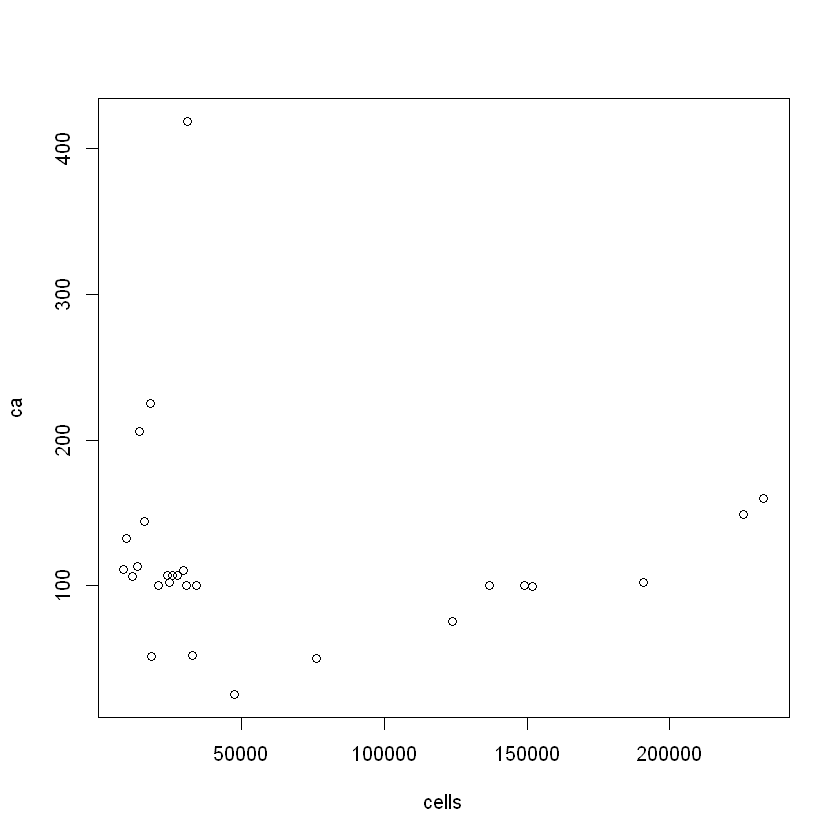


Call:
glm(formula = ca ~ offset(log(cells)) + doseamt + doserate + 
    doseamt:doserate, family = poisson(link = "log"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7308  -2.2842  -0.6264   3.3487   5.8272  

Coefficients:
                 Estimate Std. Error  z value Pr(>|z|)    
(Intercept)      -7.90511    0.06160 -128.322  < 2e-16 ***
doseamt           0.61224    0.01707   35.862  < 2e-16 ***
doserate          0.06401    0.02922    2.191 0.028476 *  
doseamt:doserate  0.02715    0.00765    3.549 0.000387 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 4753.00  on 26  degrees of freedom
Residual deviance:  270.26  on 23  degrees of freedom
AIC: 453.67

Number of Fisher Scoring iterations: 4


1 
311.3886

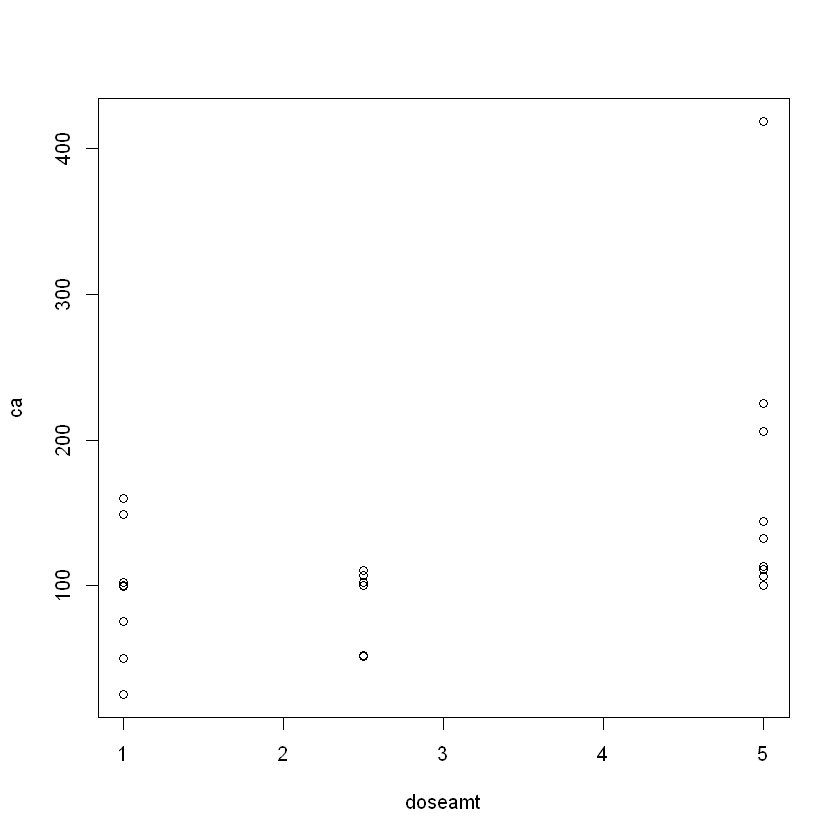

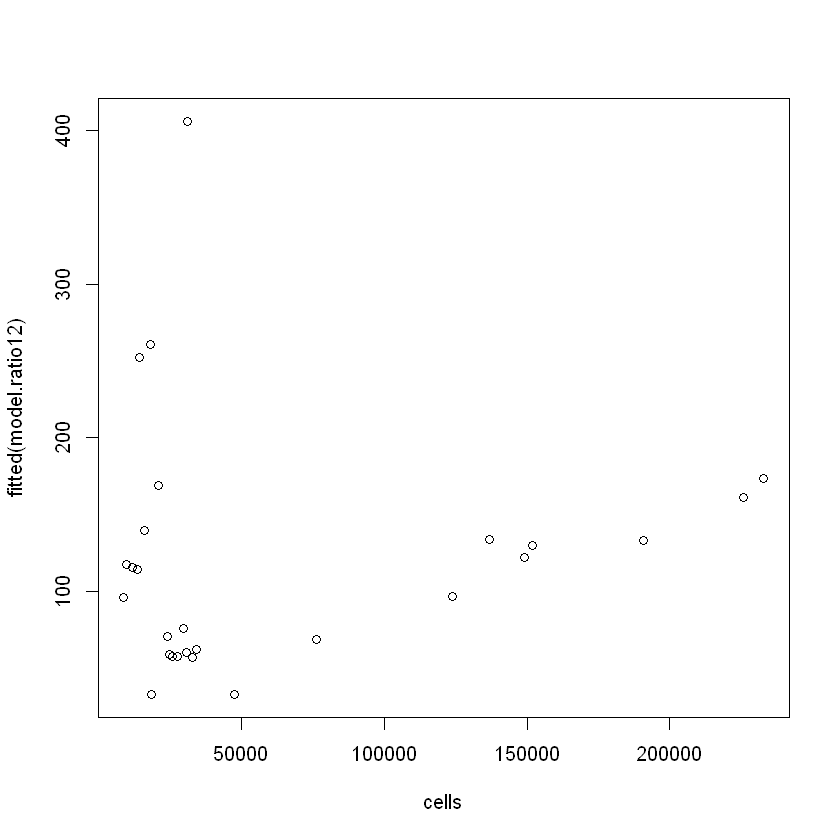

In [10]:
### 2

data<-read.table("chromoabnormal.txt", sep="\t", dec=".", header=TRUE)
attach(data)
plot(cells, ca)
plot(doseamt, ca)

## a)
model.ratio12<-glm(ca~offset(log(cells))+doseamt+doserate+doseamt:doserate, family=poisson(link="log"), data=data)
summary(model.ratio12)

newdata<-data.frame(doseamt=4, doserate=0.75, cells=64070)
#newdata<-data.frame(cells=64070, doseamt=4, doserate=0.75)
predict(model.ratio12, newdata = newdata, type = "response")
# 1 
# 311.3886

plot(cells, fitted(model.ratio12))

In [11]:
## b)

newdata<-data.frame(doseamt=4, doserate=0.75, cells=64070) 
pred<-predict(model.ratio12, newdata=newdata, type="response") # point prediction = 311.3886 
ratio.estimate<-pred/newdata$cells
ratio.estimate # 0.004860132



eta.hat<-predict(model.ratio12, newdata=newdata, type="link") # 5.741042
xf<-t(cbind(1,4,0.75,4*0.75))
cov.eta<-as.numeric(t(xf)%*%vcov(model.ratio12)%*%xf)
eta.star<-rnorm(10000, mean=eta.hat, sd=sqrt(cov.eta))
mu.star<-exp(eta.star) # inverse of log-link function

yf.star<-rpois(10000, lambda=mu.star)

lowerY.bound<-quantile(yf.star, c(0.025,0.05,0.1))
upperY.bound<-quantile(yf.star, 1-c(0.025,0.05,0.1))
lowerY.bound
upperY.bound

# 2.5%   5%  10% 
# 274  280  287 
# > upperY.bound
# 97.5%   95%   90% 
# 351   344   337

lowerRatio.bound<-quantile(yf.star/newdata$cells, c(0.025,0.05,0.1))
upperRatio.bound<-quantile(yf.star/newdata$cells, 1-c(0.025,0.05,0.1))
lowerRatio.bound
upperRatio.bound


# 2.5%          5%         10% 
# 0.004276572 0.004370220 0.004479476 
# > upperRatio.bound
# 97.5%         95%         90% 
# 0.005478383 0.005369128 0.005259872 



1 
0.004860132

2.5%   5%  10% 
 274  280  287

97.5%   95%   90% 
  351   344   336

2.5%          5%         10% 
0.004276572 0.004370220 0.004479476

97.5%         95%         90% 
0.005478383 0.005369128 0.005244264

In [12]:
## c)

quasi.ratio1<-glm(ca~offset(log(cells))+doseamt, family=quasipoisson(link="log"), data=data)
summary(quasi.ratio1)

quasi.ratio2<-glm(ca~offset(log(cells))+doseamt+doserate+doseamt:doserate, family=quasipoisson(link="log"), data=data)
summary(quasi.ratio2)

anova(quasi.ratio1, quasi.ratio2, test = "F")
anova(quasi.ratio1, quasi.ratio2, test = "F")$"Pr(>F)"[2] # [1] 0.01225317
anova(quasi.ratio1, quasi.ratio2, test = "F")$F[2] # [1] 5.363088


Call:
glm(formula = ca ~ offset(log(cells)) + doseamt, family = quasipoisson(link = "log"), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-10.2741   -2.2423   -0.7175    3.0921    6.6435  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.81951    0.15097  -51.80  < 2e-16 ***
doseamt      0.67004    0.04009   16.71 4.45e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 17.21645)

    Null deviance: 4753.0  on 26  degrees of freedom
Residual deviance:  409.4  on 25  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4



Call:
glm(formula = ca ~ offset(log(cells)) + doseamt + doserate + 
    doseamt:doserate, family = quasipoisson(link = "log"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7308  -2.2842  -0.6264   3.3487   5.8272  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -7.90511    0.22188 -35.628  < 2e-16 ***
doseamt           0.61224    0.06149   9.957 8.29e-10 ***
doserate          0.06401    0.10524   0.608    0.549    
doseamt:doserate  0.02715    0.02755   0.985    0.335    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 12.97228)

    Null deviance: 4753.00  on 26  degrees of freedom
Residual deviance:  270.26  on 23  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4


,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,25,409.4023,NA,NA,NA,NA
2,23,270.2594,2,139.1429,5.363088,0.01225317


[1] 0.01225317

[1] 5.363088

In [13]:
## d)
model.1<-glm(ca~offset(log(cells))+doseamt+doserate+doseamt:doserate, family=poisson(link="log"), data=data)
summary(model.1)

model.2<-glm(ca~offset(log(cells))+doseamt+doserate+doseamt:doserate, family=quasipoisson(link="log"), data=data)
summary(model.2)

model.3<-glm.nb(ca~offset(log(cells))+doseamt+doserate+doseamt:doserate, data=data)
summary(model.3)

MSE.M1<-sum((ca-fitted(model.1, type="response"))^2)/27
MSE.M2<-sum((ca-fitted(model.2, type="response"))^2)/27
MSE.M3<-sum((ca-fitted(model.3, type="response"))^2)/27

# another way
mean(residuals(model.1, type = "response")^2)
mean(residuals(model.2, type = "response")^2)
mean(residuals(model.3, type = "response")^2)

MSE.M1
MSE.M2
MSE.M3

# [1] 970.778
# > MSE.M2
# [1] 970.778
# > MSE.M3
# [1] 1549.685
# Distributions i. and ii. fit best in my opinion because they both have the same lowest MSE values


Call:
glm(formula = ca ~ offset(log(cells)) + doseamt + doserate + 
    doseamt:doserate, family = poisson(link = "log"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7308  -2.2842  -0.6264   3.3487   5.8272  

Coefficients:
                 Estimate Std. Error  z value Pr(>|z|)    
(Intercept)      -7.90511    0.06160 -128.322  < 2e-16 ***
doseamt           0.61224    0.01707   35.862  < 2e-16 ***
doserate          0.06401    0.02922    2.191 0.028476 *  
doseamt:doserate  0.02715    0.00765    3.549 0.000387 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 4753.00  on 26  degrees of freedom
Residual deviance:  270.26  on 23  degrees of freedom
AIC: 453.67

Number of Fisher Scoring iterations: 4



Call:
glm(formula = ca ~ offset(log(cells)) + doseamt + doserate + 
    doseamt:doserate, family = quasipoisson(link = "log"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7308  -2.2842  -0.6264   3.3487   5.8272  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -7.90511    0.22188 -35.628  < 2e-16 ***
doseamt           0.61224    0.06149   9.957 8.29e-10 ***
doserate          0.06401    0.10524   0.608    0.549    
doseamt:doserate  0.02715    0.02755   0.985    0.335    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 12.97228)

    Null deviance: 4753.00  on 26  degrees of freedom
Residual deviance:  270.26  on 23  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4



Call:
glm.nb(formula = ca ~ offset(log(cells)) + doseamt + doserate + 
    doseamt:doserate, data = data, init.theta = 10.44130185, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6740  -0.9467  -0.4614   0.9319   1.7528  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -7.82300    0.20683 -37.823   <2e-16 ***
doseamt           0.60844    0.06216   9.789   <2e-16 ***
doserate          0.05891    0.09890   0.596    0.551    
doseamt:doserate  0.03338    0.02969   1.124    0.261    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(10.4413) family taken to be 1)

    Null deviance: 303.957  on 26  degrees of freedom
Residual deviance:  27.789  on 23  degrees of freedom
AIC: 278.85

Number of Fisher Scoring iterations: 1


              Theta:  10.44 
          Std. Err.:  3.13 

 2 x log-likelihood:  -268.852 

[1] 970.778

[1] 970.778

[1] 1549.685

[1] 970.778

[1] 970.778

[1] 1549.685